In [ ]:
# Average depression (PHQ-8) score of adults during the coronavirus (COVID-19) pandemic by personal characteristics
# We will be focussing on key workers and non key workers


In [172]:
import pandas as pd
import os
import numpy as py
import seaborn as sns
import matplotlib as plt

In [149]:
# Load the data
df = pd.read_excel('/Users/lisafranchetti/Desktop/depression_key_workers.xlsx', header=None)

In [150]:
df.info

<bound method DataFrame.info of                                             0                        1   \
0                                          NaN  July 2019 to March 2020   
1                                          NaN          Unweighted base   
2                                          NaN                      NaN   
3                                   All adults                     3527   
4                                          NaN                      NaN   
5                                          Age                      NaN   
6                              16 to 39 years                       281   
7                               40 to 69 years                     2033   
8                            70 years and over                     1213   
9                                          NaN                      NaN   
10                                        Sex2                      NaN   
11                                         Men                     1

In [151]:
df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')

In [152]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,NaN,July 2019 to March 2020,NaN,NaN,NaN,NaN,June 2020,NaN,NaN,NaN,NaN
1,NaN,Unweighted base,Weighted base,Mean score,Lower CI,Upper CI,Unweighted base,Weighted base,Mean score,Lower CI,Upper CI
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,All adults,3527,51943300,3.3,3,3.6,3527,52104200,5.3,5,5.6
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
new_header = df.iloc[1]  
df.columns = new_header  # Move the info in index 1 to the column headers
df.head(5)


1,NaN,Unweighted base,Weighted base,Mean score,Lower CI,Upper CI,Unweighted base,Weighted base,Mean score,Lower CI,Upper CI
0,NaN,July 2019 to March 2020,NaN,NaN,NaN,NaN,June 2020,NaN,NaN,NaN,NaN
1,NaN,Unweighted base,Weighted base,Mean score,Lower CI,Upper CI,Unweighted base,Weighted base,Mean score,Lower CI,Upper CI
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,All adults,3527,51943300,3.3,3,3.6,3527,52104200,5.3,5,5.6
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
df.tail(10)

1,NaN,Unweighted base,Weighted base,Mean score,Lower CI,Upper CI,Unweighted base,Weighted base,Mean score,Lower CI,Upper CI
40,Not working - Aged 16 to 64 years,467,9246800,5.6,4.4,6.8,467,9283700,7,5.8,8.1
41,Not working - Aged 65 years and over,1560,10152700,2.5,2.2,2.9,1560,10170700,3.9,3.5,4.3
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,Household size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,Single person household,1169,12023900,4.3,3.7,4.9,1192,11957100,5.9,5.4,6.5
45,Multi person household,2358,39919400,3,2.6,3.3,2335,40147100,5.1,4.7,5.5
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,Parental status4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,No children under the age of 16,3100,38960500,3.4,3,3.8,3100,39072300,5.2,4.8,5.6
49,At least one child under the age of 16,427,12982700,2.9,2.3,3.4,427,13031900,5.6,4.9,6.3


In [155]:
df.shape

(50, 11)

In [156]:
# Drop index 1 as it is not required
df = df.drop(index=1)


In [157]:
df = df.reset_index(drop=True)

In [158]:
df.dtypes

1
NaN                object
Unweighted base    object
Weighted base      object
Mean score         object
Lower CI           object
Upper CI           object
Unweighted base    object
Weighted base      object
Mean score         object
Lower CI           object
Upper CI           object
dtype: object

In [159]:
df['Mean score'] = df['Mean score'].astype(float)

In [160]:
df.head(10)

1,NaN,Unweighted base,Weighted base,Mean score,Lower CI,Upper CI,Unweighted base,Weighted base,Mean score,Lower CI,Upper CI
0,NaN,July 2019 to March 2020,NaN,NaN,NaN,NaN,June 2020,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,All adults,3527,51943300,3.3,3,3.6,3527,52104200,5.3,5,5.6
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,16 to 39 years,281,19380900,3.9,3.2,4.6,268,19195600,6.8,6,7.5
6,40 to 69 years,2033,23744400,3.2,2.8,3.6,1959,23666000,4.7,4.3,5.1
7,70 years and over,1213,8818000,2.3,2,2.6,1300,9242500,3.7,3.3,4.1
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Sex2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
df.dtypes

1
NaN                 object
Unweighted base     object
Weighted base       object
Mean score         float64
Lower CI            object
Upper CI            object
Unweighted base     object
Weighted base       object
Mean score         float64
Lower CI            object
Upper CI            object
dtype: object

In [163]:
# tidy NaN by changing to a blank space for clarity/tidiness
df = df.fillna('')
df.head(50)

1,NaN,Unweighted base,Weighted base,Mean score,Lower CI,Upper CI,Unweighted base,Weighted base,Mean score,Lower CI,Upper CI
0,,July 2019 to March 2020,,,,,June 2020,,,,
1,,,,,,,,,,,
2,All adults,3527,51943300,3.3,3,3.6,3527,52104200,5.3,5,5.6
3,,,,,,,,,,,
4,Age,,,,,,,,,,
5,16 to 39 years,281,19380900,3.9,3.2,4.6,268,19195600,6.8,6,7.5
6,40 to 69 years,2033,23744400,3.2,2.8,3.6,1959,23666000,4.7,4.3,5.1
7,70 years and over,1213,8818000,2.3,2,2.6,1300,9242500,3.7,3.3,4.1
8,,,,,,,,,,,
9,Sex2,,,,,,,,,,


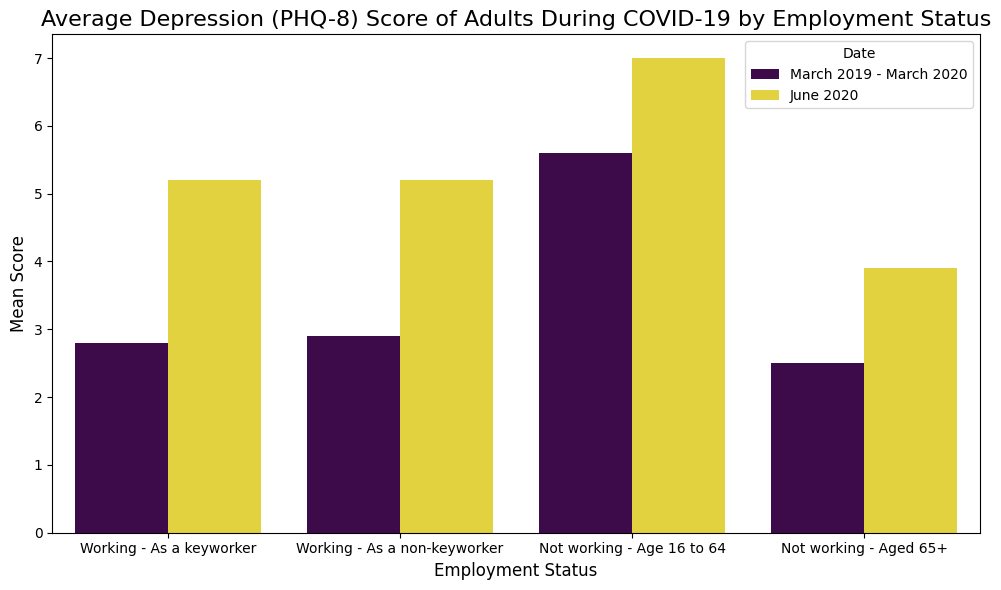

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'Employment Status': ['Working - As a keyworker', 
                          'Working - As a non-keyworker',
                          'Not working - Age 16 to 64',
                          'Not working - Aged 65+' ],
    'March 2019 - March 2020': [2.8, 2.9, 5.6, 2.5],
    'June 2020': [5.2, 5.2, 7.0, 3.9]
        }


# Create a DataFrame
df = pd.DataFrame(data)

# Reshape data for plotting
df_melted = df.melt(id_vars="Employment Status", value_vars=["March 2019 - March 2020", "June 2020"], var_name="Date", value_name="Mean Score")

# Define a colorblind-safe colour palette 
color_palette = [
    '#440154',  # Purple
    '#FDE725',  # Yellow
]

# Plot the grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Employment Status', y='Mean Score', palette=color_palette, hue='Date', errorbar=None)

# Customize the plot
plt.title("Average Depression (PHQ-8) Score of Adults During COVID-19 by Employment Status", fontsize=16)
plt.xlabel("Employment Status", fontsize=12)
plt.ylabel("Mean Score", fontsize=12)
plt.tight_layout()
plt.show()


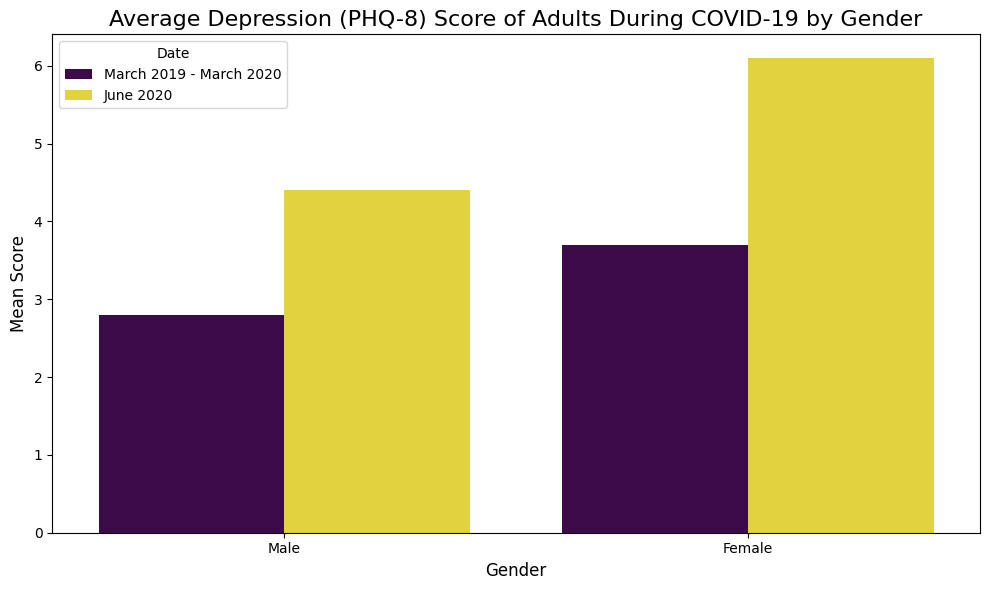

In [8]:
data = {
    'Gender':[ 'Male', 
               'Female' ],
    'March 2019 - March 2020': [2.8, 3.7],
    'June 2020': [4.4, 6.1]
        }


# Create a DataFrame
df = pd.DataFrame(data)

# Reshape data for plotting
df_melted = df.melt(id_vars="Gender", value_vars=["March 2019 - March 2020", "June 2020"], var_name="Date", value_name="Mean Score")

# Define a colorblind-safe colour palette 
color_palette = [
    '#440154',  # Purple
    '#FDE725',  # Yellow
]

# Plot the grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Gender', y='Mean Score', palette=color_palette, hue='Date', errorbar=None)

# Customize the plot
plt.title("Average Depression (PHQ-8) Score of Adults During COVID-19 by Gender", fontsize=16)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Mean Score", fontsize=12)
plt.tight_layout()
plt.show()
